In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df  = pd.read_csv('scaler.csv')

In [8]:
df.head()

,User_ID,Gender,No_of_Days,No_of_Calls,Enrolled
0,15624510,Male,0,0.30,0
1,15810944,Male,15,0.37,0
2,15668575,Female,6,2.07,0
3,15603246,Female,7,3.11,0
4,15804002,Male,0,4.52,0


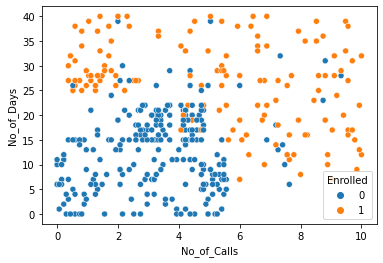

In [9]:
sns.scatterplot(x='No_of_Calls', y = 'No_of_Days', hue = 'Enrolled', data=df)
plt.show()

In [10]:
df = df[['No_of_Calls', 'No_of_Days', 'Enrolled']]

In [15]:
df = df.sample(frac=1.0)

In [16]:
df.shape[0]*0.8

320.0

In [19]:
train = df.iloc[:320, :].values
test = df.iloc[320:, :].values

In [22]:
X_train =  train[:, :-1]
y_train = train[:, -1]

X_test =  test[:, :-1]
y_test = test[:, -1]

In [23]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [24]:
y_train.shape, y_test.shape

((320,), (80,))

In [26]:
mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)

In [27]:
X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

In [58]:
def dist(a, b):
    return np.linalg.norm(a-b)





def kNNPredict(X_train, y_train, x_query, k = 5 ):
    distances = []
    n = X_train.shape[0]
    
    for i in range(n):
        d = dist(x_query, X_train[i])
        distances.append( (d, y_train[i]) )
        
    distances = sorted(distances)
    distances = distances[:k]
    distances = np.array(distances)
    labels = distances[:, -1]
    
    
    ans = int(pd.Series(labels).value_counts().index[0])
        
    return ans

In [59]:
kNNPredict(X_train, y_train, X_test[73])

0

In [61]:
X_test[73]

array([0.04812471, 0.00513473])

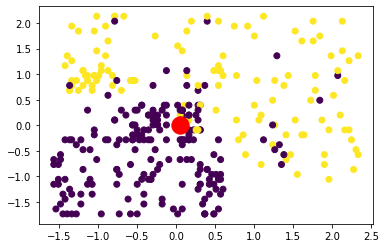

In [68]:
plt.scatter(X_train[:, 0], X_train[:, 1],  c = y_train)
plt.scatter(X_test[73][0], X_test[73][1], c = 'red', s= 300)
plt.show()

### Predict for test data

In [104]:
y_pred = []
for xq in X_test:
    p = kNNPredict(X_train, y_train, xq, k=7)
    y_pred.append(p)
    
y_pred = np.array(y_pred)

In [105]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [106]:
y_test

array([0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.])

### Accuracy 

In [107]:
(y_pred == y_test).mean()

0.9

# SKlearn kNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [119]:
model.score(X_test, y_test)

0.8875

In [120]:
model.predict(X_test)

array([0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.])

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
scores = cross_val_score(model, X_train, y_train, cv = 5, )

In [125]:
scores

array([0.890625, 0.96875 , 0.890625, 0.9375  , 0.875   ])